# Auswertung und Darstellung von Magnetikdaten
Im Gelände wurden zwei Sets von Magnetikdaten aufgenommen. Bei diesen Messungen wurde eine Basisstation aufgestellt, die bei fixer Postition die zeitlichen Veränderungen im Magnetfeld aufzeichnet, und ein Mobiles System (Rover) genutzt, welches ein Profil abfährt und so räumliche Veränderungen aufzeichnet. Mithilfe der Basisstation können die relativen räumlichen Änderungen berechnet und Korrekturen für zeitliche Effekte durchgeführt werden. Erstellen Sie aus den mobilen Daten und den Basiswerten eine Karte der 3D Verteilung der Abweichungen Magnetfeldstärke von der Basisstation.
Dazu müssen folgende Schritte durchgeführt werden:

* Laden Sie die Datensets ein und filtern sie Ausreißer in den Datensets.

* Filtern Sie x,y und z Koordinaten, die 0 entsprechen

* Filtern Sie Datenpunkte die eine Signalquality von unter 90 besitzen

* Die Daten der Basisstation wurden in 2 Sekunden Schritten aufgenommen, die Roverdaten halbsekündlich. Interpolieren Sie die Basisdaten halbsekündliche Schritte und berechnen Sie relativen Änderungen. Nutzen sie für die Interpolation si.interp1d(x,y, kind='cubic')

* Stellen Sie die Daten in einem 2D (ohne Höhe) und 3D-Plot (inklusive Höhe) dar


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.interpolate as si
import pandas as pd
import datetime

%matplotlib inline 

# In numpy

Einladen der Datensätze

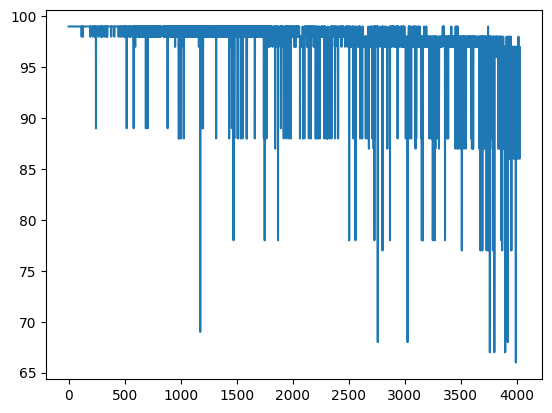

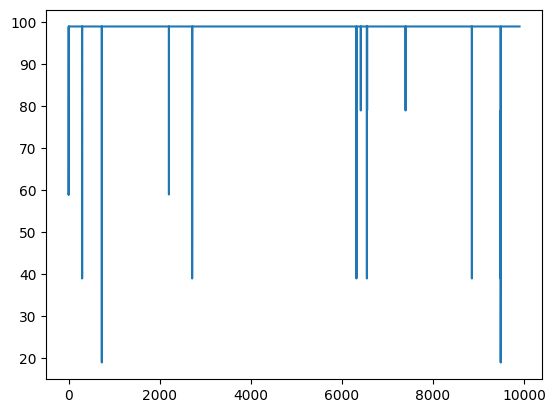

In [3]:
Basenp = np.loadtxt('Magnetik_Base_Tag_3.txt', skiprows= 7 , usecols = [0,1,2]) # Für diese Aufgabe werden nur columns 1-3 gebraucht
Mobilnp = np.loadtxt('Magnetik Mobil Tag 3_korrigiert.txt', skiprows=7, usecols=(0, 1, 2, 3, 4, 5, 8), dtype=float) #Für die Mobile unit wird noch x,y und die z benötigt
plt.plot(Basenp[:,2])
plt.show()
plt.plot(Mobilnp[:,5])

* Hier ist als Basenp[0] die Zeit, [1] B und [2] die signal quality.
* Mobilnp ist nach x [0], y [1], z [2], B [3], Gradient [4], signal qualtiy [5] und Zeit [6] aufgebaut. 

# Filtern

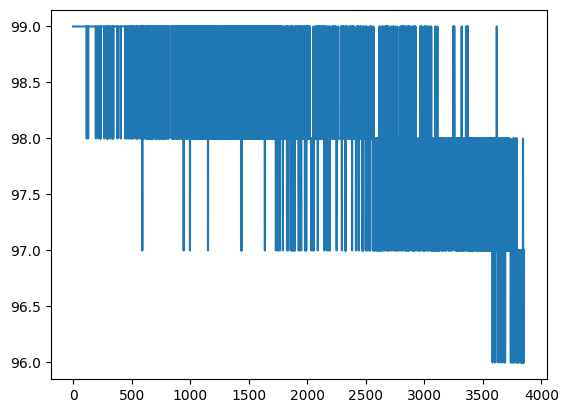

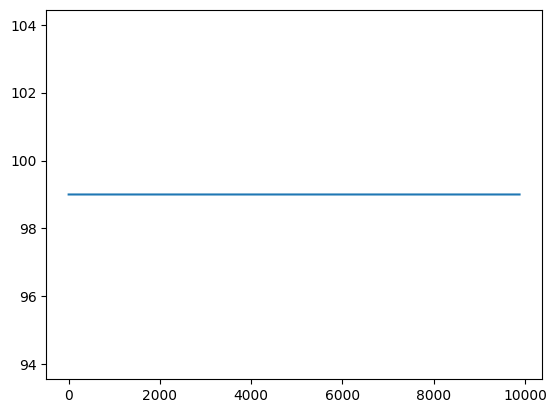

In [4]:
index = np.where(Basenp[:,2]<90) # Alles unter 90
Basenp = np.delete(Basenp,index,axis = 0)
index = np.where(Mobilnp[:,5]<90) 
Mobilnp = np.delete(Mobilnp,index,axis = 0) # Alles gleich 0
index = np.where(Mobilnp[:,2]==0)
Mobilnp = np.delete(Mobilnp,index,axis = 0) 
index = np.where(Mobilnp[:,3]==0)
Mobilnp = np.delete(Mobilnp,index,axis = 0)
plt.plot(Basenp[:,2])
plt.show()
plt.plot(Mobilnp[:,5])

In [5]:
interpolnp = si.interp1d(Basenp[:,0], Basenp[:,1], kind='cubic') # Interpolieren

In [6]:
Mobilnpdiffs = Mobilnp[:,3]-interpolnp(Mobilnp[:,6]) # Korrektur

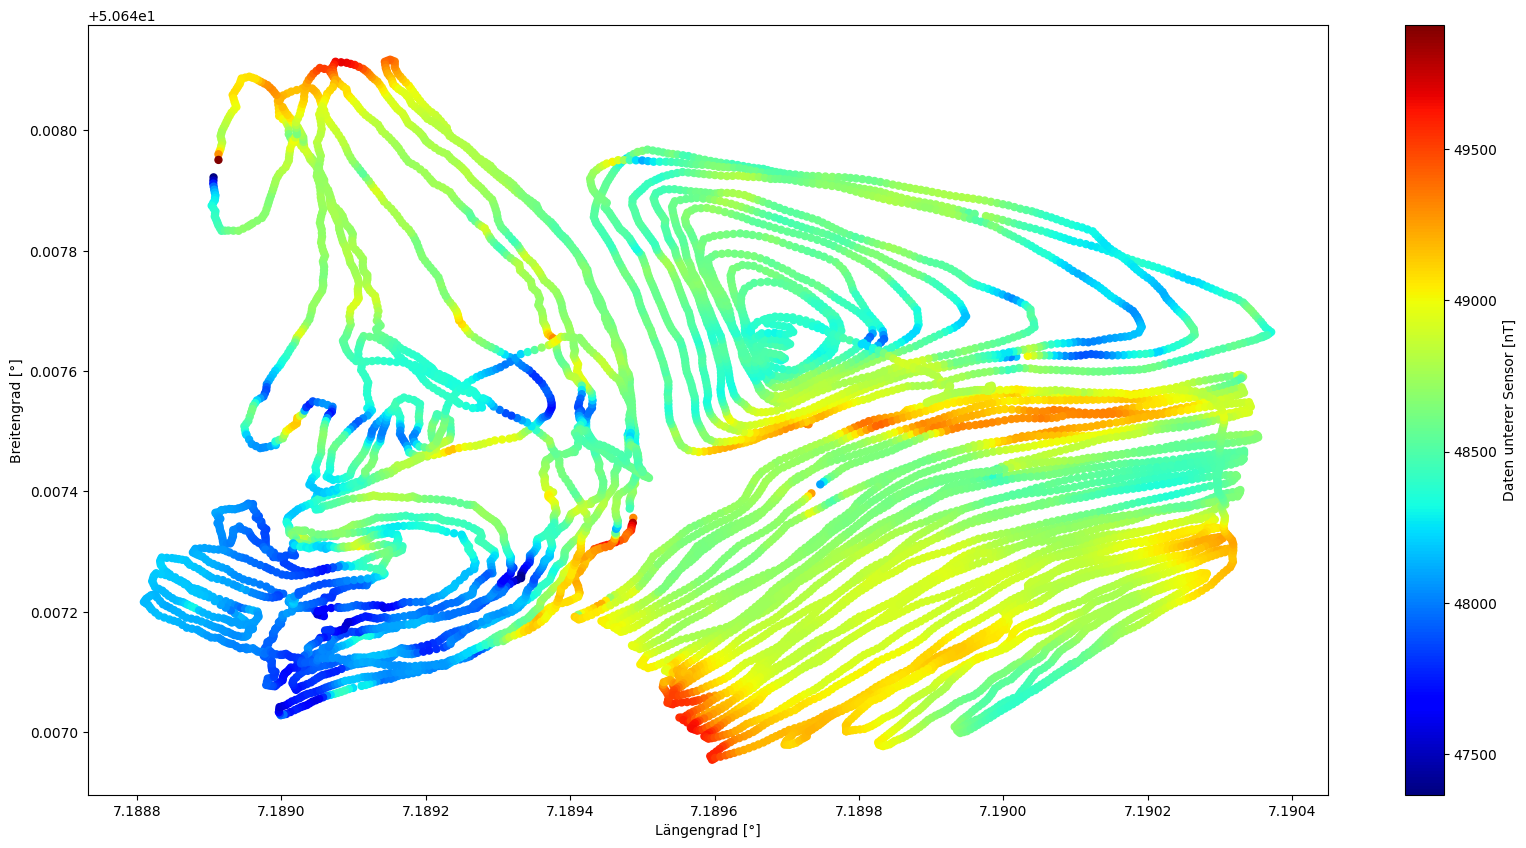

In [7]:
fig, ax = plt.subplots(figsize=(20, 10)) #Scatterplot
sc = ax.scatter(
    Mobilnp[:,1],
    Mobilnp[:,0],
    s=25,
    c=Mobilnp[:,3],
    cmap='jet',
)
cb = fig.colorbar(sc)
ax.set_ylabel('Breitengrad [°]')
ax.set_xlabel('Längengrad [°]')
cb.set_label('Daten unterer Sensor [nT]')

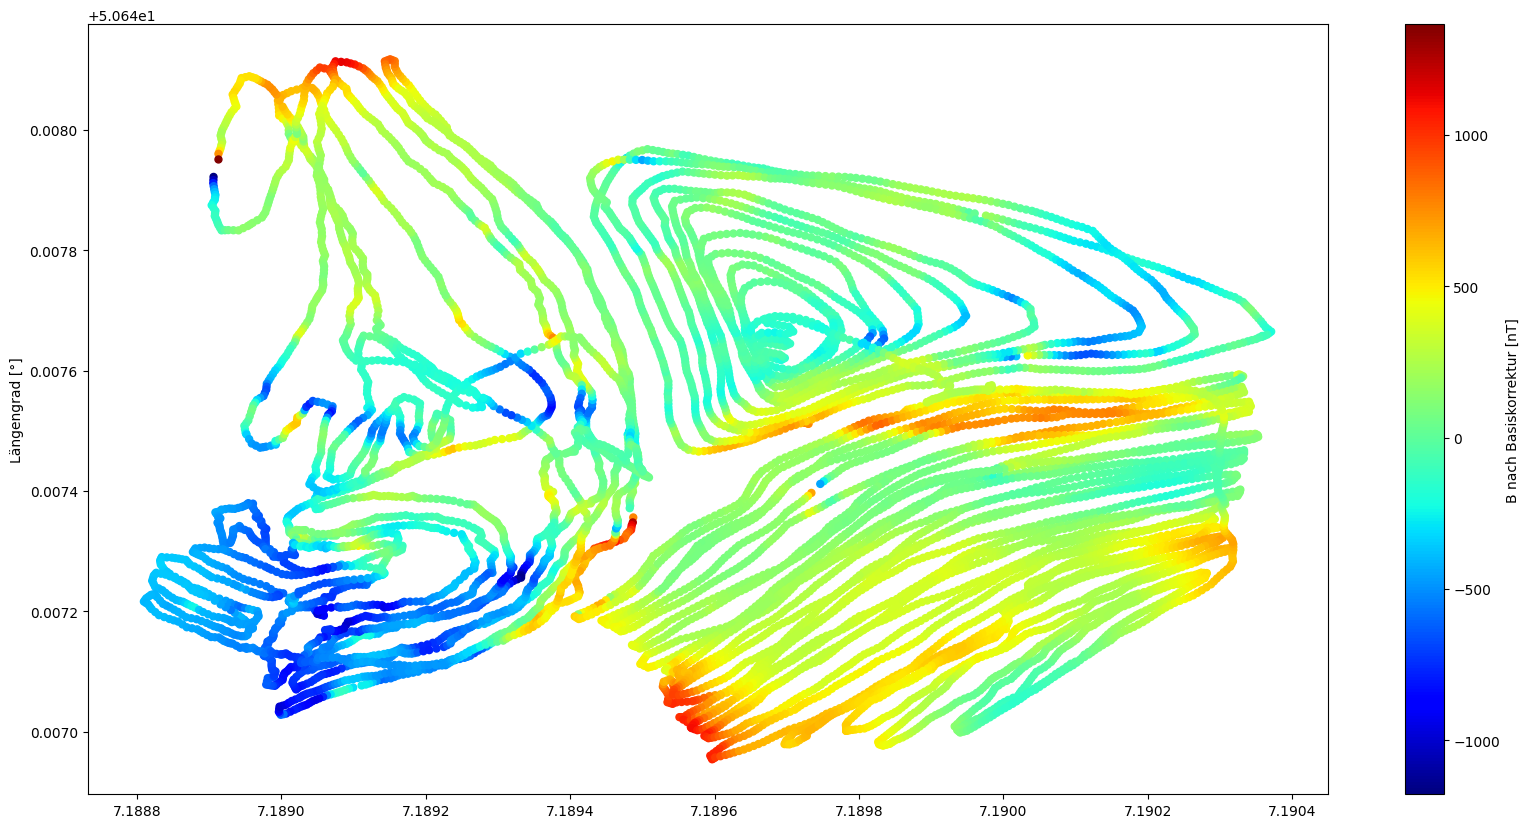

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
sc = ax.scatter(
    Mobilnp[:,1],
    Mobilnp[:,0],
    s=25,
    c=Mobilnpdiffs,
    cmap='jet',
)
ax.set_ylabel('Breitengrad [°]')
ax.set_ylabel('Längengrad [°]')
cb = fig.colorbar(sc)
cb.set_label('B nach Basiskorrektur [nT]')

/tmp/ipykernel_2437034/2334900357.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap, label = 'B [nT]')


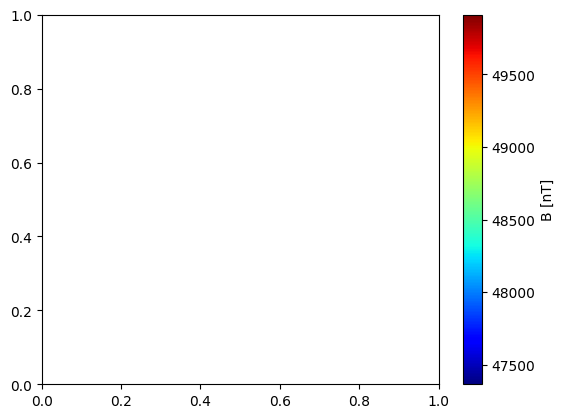

In [9]:
cm = plt.get_cmap('jet') #3D plotten
cNorm = mpl.colors.Normalize(vmin=min(Mobilnp[:,3]), vmax=max(Mobilnp[:,3]))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Mobilnp[:,1],Mobilnp[:,0],Mobilnp[:,2], c=scalarMap.to_rgba(Mobilnp[:,3]),zdir= (1,0,0))
ax.set_ylabel('Breitengrad [°]')
ax.set_xlabel('Längengrad [°]')
ax.set_zlabel('Höhe [m]')
ax.elev = 50 # Sichtwinkel anpassen
ax.azim = 20
#scalarMap.set_array(Mobil['nT'])
fig.colorbar(scalarMap, label = 'B [nT]')
plt.show()

# Sichten des Basisdatensatzes mit pandas

In [10]:
Base = pd.read_csv('Magnetik_Base_Tag_3.txt', skiprows = 7, sep = '\s+', header = None) # Einladen der Daten
Base.columns = ['Time', 'nT', 'sq']

Text(0, 0.5, 'B [nT]')

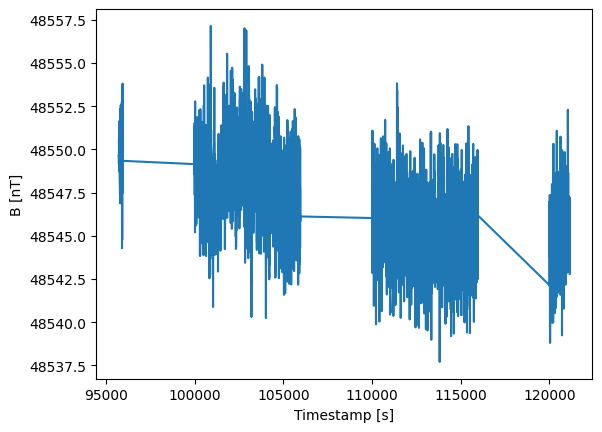

In [11]:
plt.plot(Base['Time'],Base['nT'])
plt.xlabel('Timestamp [s]')
plt.ylabel('B [nT]')
#plt.savefig('Base.jpg')

In [12]:
Base = Base[(Base['sq']>90)] # Filtern nach sq

# Mobile Unit

In [13]:
Mobil = pd.read_csv('Magnetik Mobil Tag 3_korrigiert.txt', skiprows = 7, sep = '\s+', header = None) # Einladen der Daten
Mobil.columns = ['Breite','Laenge','Hoehe','nT','nT/m','sq','cor-nT','sat','Time','picket-x','picket-y','S'] 


In [14]:
Mobil = Mobil[(Mobil['nT']!=0)] # Alles ungleich 0
Mobil = Mobil[(Mobil['Hoehe']!=0)]# Alles ungleich 0 finden
Mobil = Mobil[(Mobil['sq']>90)] # Alles größer 90 finden

In [15]:
interpol = si.interp1d(Base['Time'], Base['nT'], kind='cubic') # Interpolieren

In [16]:
Mobil['nT_diffs'] = Mobil['nT']-interpol(Mobil['Time']) # Anlegen einer Spalte für die korrigierten Daten

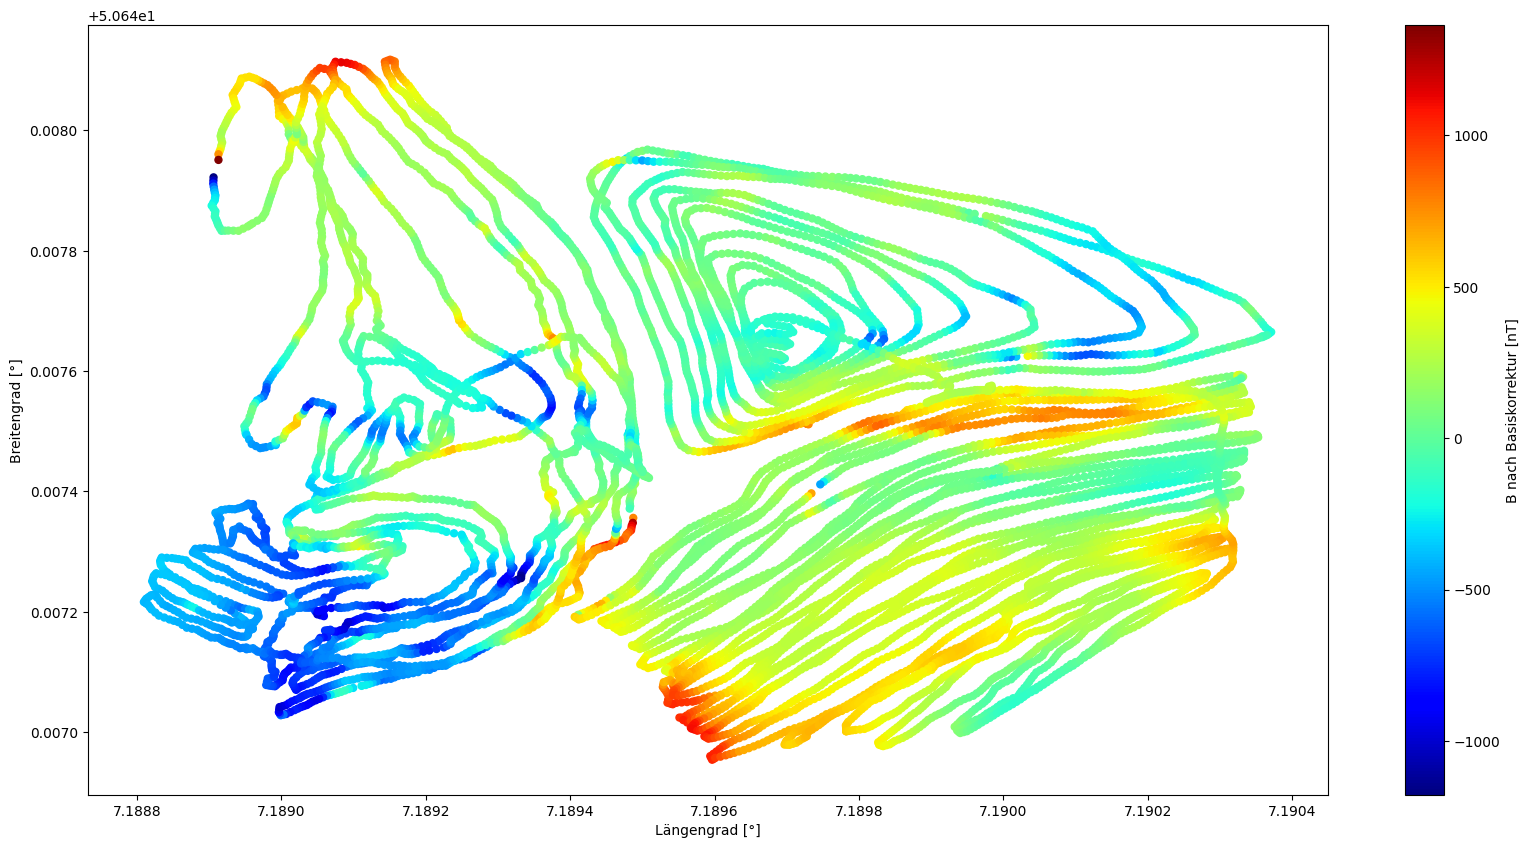

In [17]:
fig, ax = plt.subplots(figsize=(20, 10)) # Plotten
sc = ax.scatter(
    Mobil['Laenge'],
    Mobil['Breite'],
    s=25,
    c=Mobil['nT_diffs'],
    cmap='jet',
)
ax.set_ylabel('Breitengrad [°]')
ax.set_xlabel('Längengrad [°]')
cb = fig.colorbar(sc)
cb.set_label('B nach Basiskorrektur [nT]')

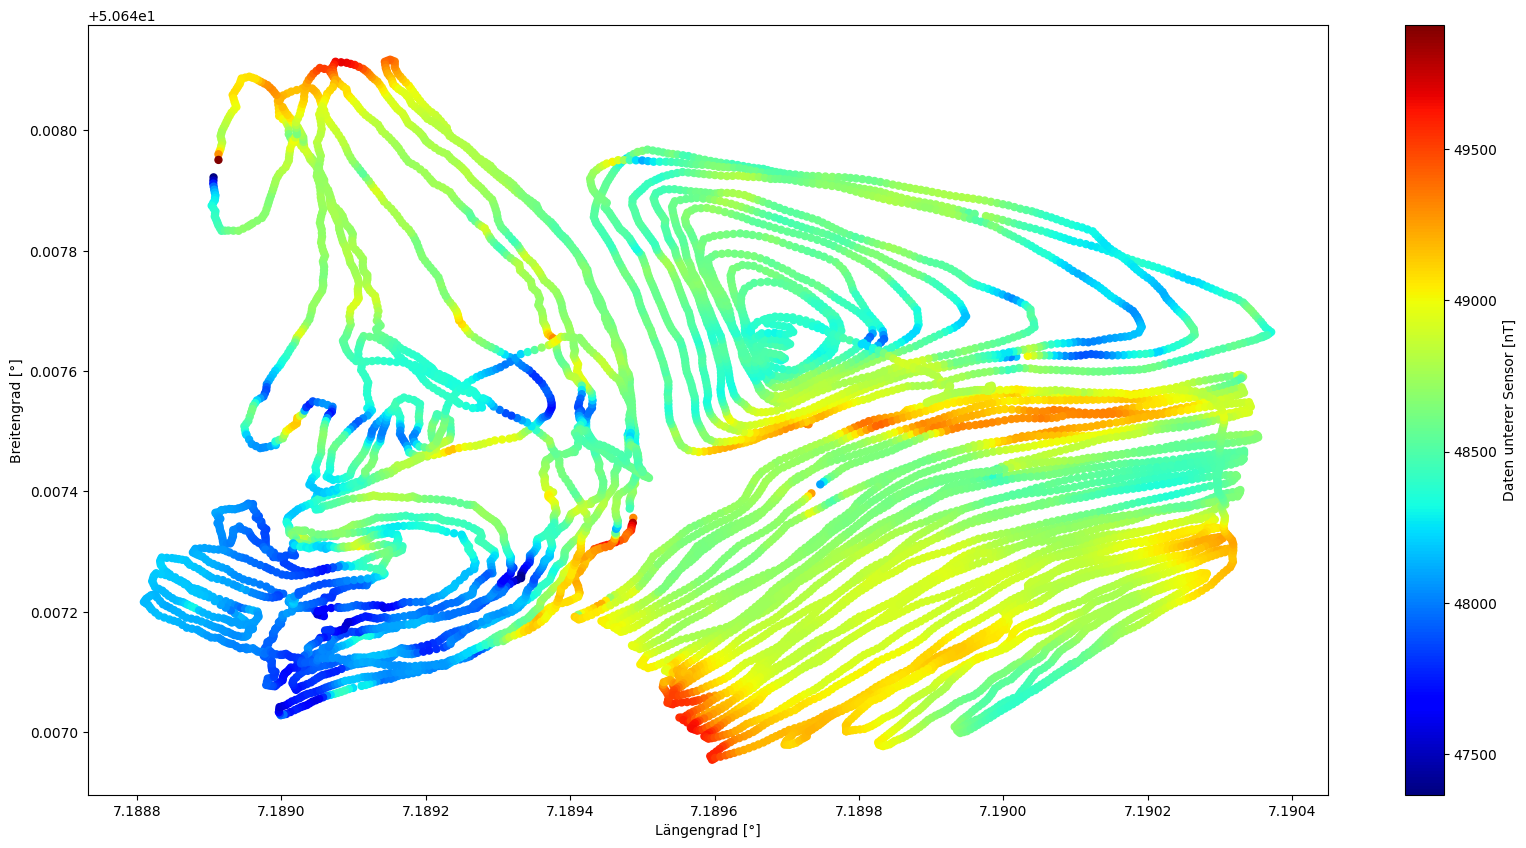

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sc = ax.scatter(
    Mobil['Laenge'],
    Mobil['Breite'],
    s=25,
    c=Mobil['nT'],
    cmap='jet',
)
ax.set_ylabel('Breitengrad [°]')
ax.set_xlabel('Längengrad [°]')
cb = fig.colorbar(sc)
cb.set_label('Daten unterer Sensor [nT]')

/tmp/ipykernel_2437034/1664958048.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap, label = 'B [nT]')


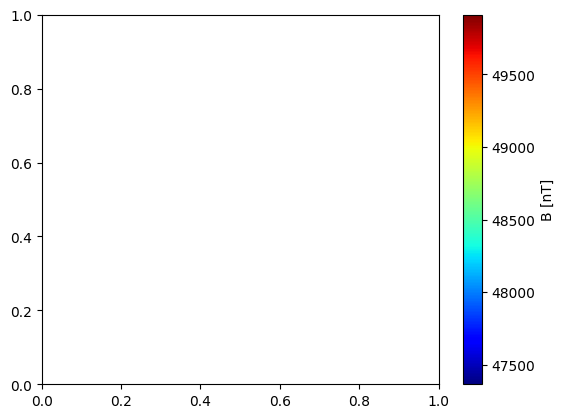

In [19]:
cm = plt.get_cmap('jet') #3D plotten
cNorm = mpl.colors.Normalize(vmin=min(Mobil['nT']), vmax=max(Mobil['nT']))
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Mobil['Laenge'],Mobil['Breite'],Mobil['Hoehe'], c=scalarMap.to_rgba(Mobil['nT']),zdir= (1,0,0))
ax.set_ylabel('Breitengrad [°]')
ax.set_xlabel('Längengrad [°]')
ax.set_zlabel('Höhe [m]')
ax.elev = 50 # Sichtwinkel anpassen
ax.azim = 20
#scalarMap.set_array(Mobil['nT'])
fig.colorbar(scalarMap, label = 'B [nT]')
plt.show()

# 2D Interpolation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CloughTocher2DInterpolator.html#scipy.interpolate.CloughTocher2DInterpolator

(9883, 2) (9883,)
(200, 200) (200, 200) (200, 200)


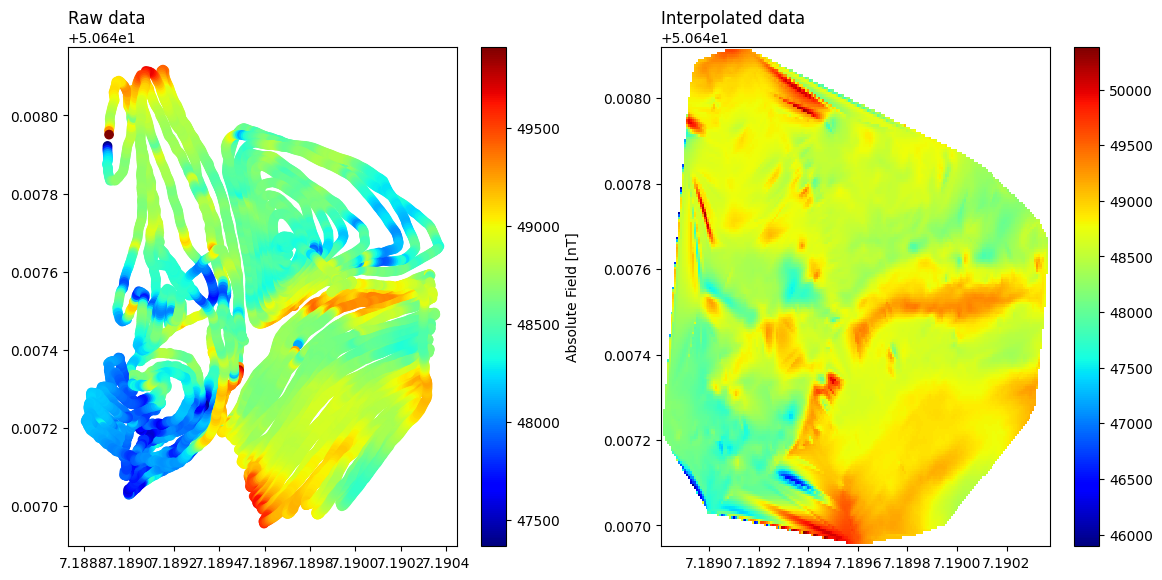

In [43]:
x = Mobil['Laenge']
y = Mobil['Breite']
z = Mobil['Hoehe']
mag = Mobil['nT']

from scipy.interpolate import CloughTocher2DInterpolator

# Define the 2D grid for interpolation
X = np.linspace(min(x), max(x), num=200)
Y = np.linspace(min(y), max(y), num=200)
X, Y = np.meshgrid(X, Y)

xy = np.vstack((x, y)).T

interp = CloughTocher2DInterpolator(xy, mag)

Z = interp(X, Y)
fig, axes = plt.subplots(1, 2, figsize=(30 / 2.54, 15 / 2.54))
ax = axes[0]
ax.set_title('Raw data', loc='left')
sc = ax.scatter(
    x,
    y,
    c=mag,
    cmap='jet',
)
cb = fig.colorbar(sc, ax=ax)
cb.set_label('Absolute Field [nT]')
ax = axes[1]
ax.set_title('Interpolated data', loc='left')
pm = ax.pcolormesh(X, Y, Z, shading='auto', cmap='jet')
print(pm)
print(xy.shape, mag.shape)
print(X.shape, Y.shape, Z.shape)
fig.colorbar(pm, ax=ax)

fig.tight_layout()